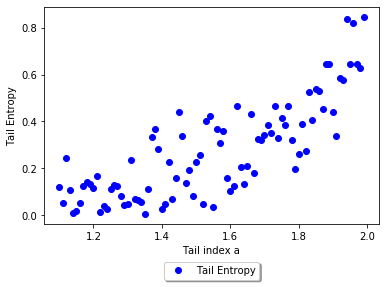

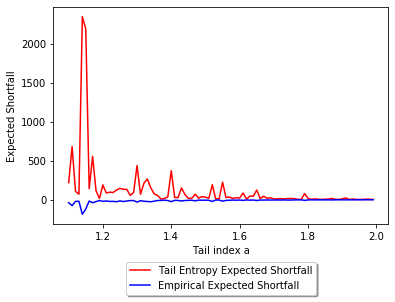

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import levy_stable
from scipy.stats import norm
from scipy.stats import linregress
from scipy.stats import multinomial
import matplotlib.pyplot as plt
import statsmodels.api as sm


def entropy(hist, bit_instead_of_nat=True):

    h = np.asarray(hist, dtype=np.float64)

    h = h/h.sum()
    log_fn = np.ma.log2 if bit_instead_of_nat else np.ma.log
    return -(h*log_fn(h)).sum()



entr=[]
tail_index=[]
ES=[]
TE_ES=[]
Tail_Entropy=[]
a_index=[]
alpha=0.025
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

for a in frange (1.1,2,0.01):

    s =levy_stable.rvs(a, 0, loc=0, scale=1, size=1000, random_state=None)
    
    q=np.quantile(s,alpha)
    
  
    x=s[s<q]
    es=np.mean(x)
       
    bins=10
    hist=np.histogram(s, bins)

    p=hist[0].astype(float)/hist[0].sum()     #probability of bins
    bootstrap_ent=[]
    for k in range(1,100):
        rv=multinomial.rvs(100, p, size=1, random_state=None)
        b_ent=entropy(rv, bit_instead_of_nat=True)/np.log2(bins)
        bootstrap_ent.append(b_ent)
    b0=np.min(hist[1])
    b1=np.max(hist[1])

    ent=2*(entropy(hist[0], bit_instead_of_nat=True)/np.log2(bins))-np.mean(bootstrap_ent)
    te=-(b0+(b1-b0)*ent/2)
    Tail_Entropy.append(ent)
    TE_ES.append(te)

    ES.append(es)
    a_index.append(a)

plt.plot(a_index, Tail_Entropy,'o',c='blue', label='Tail Entropy')
plt.xlabel( 'Tail index a' )
plt.ylabel( 'Tail Entropy' )
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()


plt.plot(a_index,TE_ES, label='Tail Entropy Expected Shortfall', c='red')

plt.plot(a_index, ES, label='Empirical Expected Shortfall', c='blue')
plt.xlabel( 'Tail index a' )
plt.ylabel( 'Expected Shortfall' )
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)
plt.show()

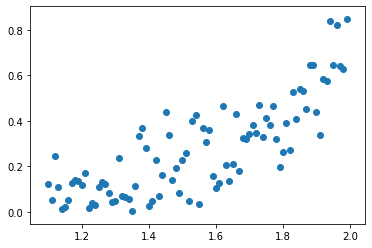

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     159.4
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           1.87e-21
Time:                        13:30:35   Log-Likelihood:                 60.566
No. Observations:                  90   AIC:                            -117.1
Df Residuals:                      88   BIC:                            -112.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7108      0.079     -8.957      0.0

In [16]:



x=a_index
y=Tail_Entropy
plt.scatter(x, y)
plt.show()
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())